<a href="https://colab.research.google.com/github/Paulo-vitorCS/DeepLearning/blob/main/Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 01: Classificação Binária Breast Cancer

###Etapa 01: Importação das bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns  # Biblioteca gráfica
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import torch
torch.__version__
!pip install torch==1.4.0

In [ ]:
import torch.nn as nn  # nn = neural networks

###Etapa 02: Base de dados

In [ ]:
np.random.seed(123)  # Semente geradora aleatória (definindo a semente, sempre gera os mesmos números aleatórios)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [ ]:
previsores.shape  # Mostra a quantidade de dados dos previsores (569 linhas, 30 caracteristicas)

(569, 30)

In [ ]:
previsores.head()  # Mostra os 5 primeiros

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
np.unique(classe)  # Indica os dados únicos

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


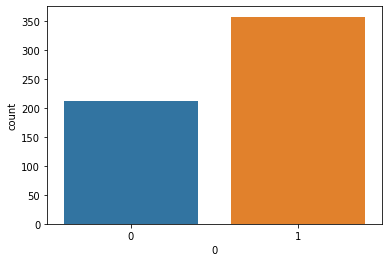

In [ ]:
sns.countplot(classe['0']);

In [ ]:
# Dividir os dados com conjuntos de treinamento e teste. 25% de teste
previsores_treino, previsores_teste, classe_treino, classe_teste = train_test_split(previsores, 
                                                                                    classe, 
                                                                                    test_size=0.25)  

In [ ]:
previsores_treino.shape

(426, 30)

In [ ]:
classe_treino.shape

(426, 1)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_teste.shape

(143, 1)

###Etapa 03: Transformação dos dados para tensores

In [ ]:
type(previsores_treino)  # O resultado mostra que a base está no formato dataframe do pandas

pandas.core.frame.DataFrame

In [ ]:
type(np.array(previsores_treino))  # Convertendo previsores_treino para np.array

numpy.ndarray

In [ ]:
previsores_treino = torch.tensor(np.array(previsores_treino), dtype = torch.float)  # Convertendo para tensores
classe_treino = torch.tensor(np.array(classe_treino), dtype = torch.float)

In [ ]:
type(previsores_treino)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treino, classe_treino)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

###Etapa 04: Construção do Modelo

In [ ]:
# 30 neurônios na camada de entrada (de acordo com os atributos da base de dados)
# 2 camadas ocultas, com 16 neurônios cada
# camada de saída com um neurônio (classificação binária)
# 30 -> 16 -> 16 -> 1
# Somatório (entrada + saida) / 2 = (30 + 1) / 2 =~ 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),  # 30 -> 16
    nn.ReLU(),  # Relu function
    nn.Linear(16, 16),  # 16 -> 16
    nn.ReLU(), 
    nn.Linear(16, 1),
    nn.Sigmoid()  # Função de ativação sigmoide retorna um probabilidade (entre 0 e 1)
)

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy (Calculo do erro)

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)  # lr = learning rate

###Etapa 05: Treinamento do Modelo

In [ ]:
for epoch in range(100):  # roda por 100 vezes a atualização dos pesos
    running_loss = 0.  # Variável para acumular o erro
    for data in train_loader:
        inputs, labels = data
        #print(inputs)
        #print('--------')
        #print(labels)
        optimizer.zero_grad()  # zerar os valores acumulados em cada ajuste de peso
        outputs = classificador(inputs) # previsões para cada um dos registros
        # Compararar as saidas (outputs) com os valores reais da base de dados
        loss = criterion(outputs, labels)  # labels = respostas reais
        loss.backward()
        optimizer.step()  # Atualização dos pesos

        running_loss += loss.item()
    print('Época %3d: perda %.5f' %(epoch+1, running_loss/len(train_loader)))

Época   1: perda 0.11837
Época   2: perda 0.13308
Época   3: perda 0.12063
Época   4: perda 0.12322
Época   5: perda 0.11757
Época   6: perda 0.10744
Época   7: perda 0.11558
Época   8: perda 0.09954
Época   9: perda 0.10528
Época  10: perda 0.13231
Época  11: perda 0.11756
Época  12: perda 0.11083
Época  13: perda 0.13749
Época  14: perda 0.12701
Época  15: perda 0.13506
Época  16: perda 0.16061
Época  17: perda 0.11623
Época  18: perda 0.09509
Época  19: perda 0.12215
Época  20: perda 0.10361
Época  21: perda 0.12315
Época  22: perda 0.12524
Época  23: perda 0.12097
Época  24: perda 0.10468
Época  25: perda 0.10049
Época  26: perda 0.16442
Época  27: perda 0.09982
Época  28: perda 0.13267
Época  29: perda 0.21270
Época  30: perda 0.14741
Época  31: perda 0.12312
Época  32: perda 0.11162
Época  33: perda 0.15645
Época  34: perda 0.11547
Época  35: perda 0.10071
Época  36: perda 0.13111
Época  37: perda 0.31136
Época  38: perda 0.12849
Época  39: perda 0.11217
Época  40: perda 0.11650


###Etapa 06: Visualização dos pesos

In [ ]:
params = list(classificador.parameters())

In [ ]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

###Etapa 07: Avaliação do Modelo

In [ ]:
classificador.eval()  # eval = evaluate

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
# Convertendo para tensor
previsores_teste = torch.tensor(np.array(previsores_teste), dtype = torch.float)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste)

In [ ]:
previsoes

tensor([[9.9672e-01],
        [1.0000e+00],
        [6.1214e-01],
        [9.8257e-01],
        [1.8340e-06],
        [9.9072e-01],
        [9.7290e-01],
        [9.9999e-01],
        [9.7541e-01],
        [9.4056e-01],
        [9.9533e-01],
        [9.9981e-01],
        [9.9063e-01],
        [9.9745e-01],
        [9.2018e-01],
        [9.8172e-01],
        [9.9824e-01],
        [1.0000e+00],
        [9.3540e-01],
        [9.9996e-01],
        [3.5211e-10],
        [1.7387e-03],
        [8.0280e-01],
        [1.0000e+00],
        [9.5063e-01],
        [5.6963e-04],
        [1.3442e-01],
        [1.0000e+00],
        [2.1691e-06],
        [9.9934e-01],
        [5.0708e-01],
        [1.0000e+00],
        [8.8011e-01],
        [9.9078e-01],
        [2.9707e-01],
        [9.9961e-01],
        [6.4712e-01],
        [9.9999e-01],
        [9.9994e-01],
        [5.7382e-07],
        [1.1541e-03],
        [9.4357e-01],
        [6.0338e-06],
        [3.6131e-01],
        [2.8177e-07],
        [8

In [ ]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[42, 12],
       [ 2, 87]])

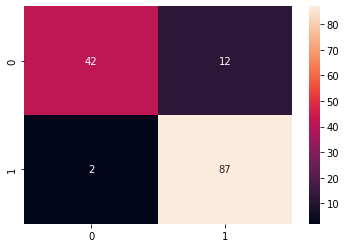

In [ ]:
sns.heatmap(matriz, annot=True);